In [2]:
from random import seed
from random import randrange
from csv import reader
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [182]:
def centeroid(arr):
    arr = np.array(arr)
    return np.sum(arr, axis=0)/arr.shape[0]

def split_by_label(X, y):
    data = {}
    for idx, x_i in enumerate(X):
        if y[idx] not in data:
            data[y[idx]] = []
        data[y[idx]].append(x_i)
    return data

def plt_line(W):
    # calculate slope-intercept form from W
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    plt.plot(x1, x2, 'y-')    

In [172]:
def activation(z):
    return 1.0 if (z > 0) else -1.0

def perceptron(X, y, epochs):
    # m = num training examples, n = num features
    m, n = X.shape
    # initialize weights to zeros, n+1 for bias term
    W = np.zeros((n+1,1))
    
    for epoch in range(epochs):
        for idx, x_i in enumerate(X):
            # insert 1 for bias
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # activation
            a = np.dot(x_i.T, W)
            # update
            if (y[idx]*np.squeeze(a)) <= 0:
                W += (y[idx])*x_i

    return W

In [173]:
def plot_decision_boundary(X, y, W, centers=[]):
    # calculate slope-intercept form from W
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    # plot
    fig = plt.figure()
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

    if len(centers):
        plt.plot(centers[:, 0], centers[:, 1], 'g+')

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.plot(x1, x2, 'y-')

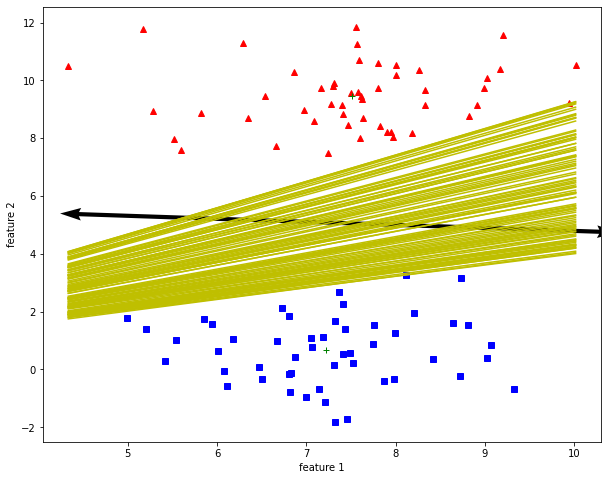

In [242]:
# generate clustered data
X, y = datasets.make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    random_state=8
)
y[y==0] = -1


# plot
fig = plt.figure(figsize=(10, 8))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

# train and plot
for i in range(100):
    X,y = shuffle(X,y)
    W = perceptron(X, y, 100)
    plt_line(W)

data = split_by_label(X, y)
c1 = centeroid(data[-1]); c2 = centeroid(data[1])
centers = np.array([c1, c2])
midpoint = (c1+c2)/2
slope = -1/((c1[1]-c2[1])/(c1[0]-c2[0]))
plt.quiver(midpoint[0], midpoint[1], 1, slope, scale=2)
plt.quiver(midpoint[0], midpoint[1], -1, -slope, scale=2)
plt.plot(centers[:, 0], centers[:, 1], 'g+')

plt.show()

D=2, average distance=0.718501
D=8, average distance=3.22021
D=32, average distance=13.1076
D=128, average distance=51.9385
D=512, average distance=208.779


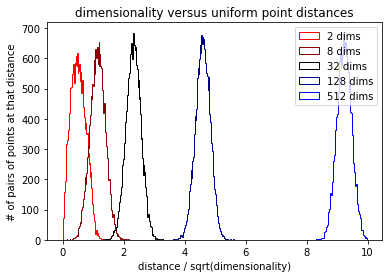

In [3]:
from math import *
import random
from numpy import *
import matplotlib.pyplot as plt

waitForEnter=False

def generateUniformExample(numDim):
    return [random.random() for d in range(numDim)]

def generateUniformDataset(numDim, numEx):
    return [generateUniformExample(numDim) for n in range(numEx)]

def computeExampleDistance(x1, x2):
    dist = 0.0
    for d in range(len(x1)):
        dist += (x1[d] - x2[d]) * (x1[d] - x2[d])
    return sqrt(dist)

def computeDistances(data):
    N = len(data)
    D = len(data[0])
    dist = []
    for n in range(N):
        for m in range(n):
            dist.append( computeExampleDistance(data[n],data[m]))
    return dist

N    = 200                   # number of examples
Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 10, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus uniform point distances')

for i,d in enumerate(Dims):
    distances = computeDistances(generateUniformDataset(d, N))
    print ("D=%d, average distance=%g" % (d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    if waitForEnter:
        plt.legend(['%d dims' % d for d in Dims])
        plt.show(False)
        x = raw_input('Press enter to continue...')


plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig.pdf')
plt.show()

In [33]:
x = np.array([[-1,1],[0,2],[-1,-2],[2,0]])
y = np.array([-1,-1,1,1])
w = np.array([1,-1])
b = 0

In [ ]:
# logistic loss
sum = 0

for i in range(4):
    print(np.log(1 + np.exp(-y[i]*(np.dot(w.T, x[i]) + b))))
    sum += np.log(1 + np.exp(-y[i]*(np.dot(w.T, x[i]) + b)))

print()
print(sum/4)

In [43]:
# squared loss
sum = 0

for i in range(4):
    print((np.dot(w.T, x[i]) + b - y[i])**2)
    sum += (np.dot(w.T, x[i]) + b - y[i])**2

print()
print(sum/4)

1
1
0
1

0.75


In [47]:
sum = 0

for i in range(4):
    print(max(0, 1 - y[i]*(np.dot(w.T, x[i]) + b)))
    sum += max(0, 1 - y[i]*(np.dot(w.T, x[i]) + b))

print()
print(sum/4)

0
0
0
0

0.0
